In [46]:
#HW3

In [47]:
#Problem1

In [48]:
#PB1-a-b

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.random.seed(0)

In [4]:
train_df = pd.read_csv('train.csv')
print(train_df.shape)
train_df.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test_df = pd.read_csv('test.csv')
print(test_df.shape)

(1459, 80)


In [6]:
#test_df.dtypes.tolist()

In [7]:
# Training data has 1460 samples
# It has 81-1(id)-1(target) 79 features
# Of these the following are explicitly categorical without numerical categories

zipped = zip(test_df.dtypes.tolist(), test_df.columns.tolist())
for tup in zipped:
    if tup[0] == np.dtype('O'):
        print(tup)

(dtype('O'), 'MSZoning')
(dtype('O'), 'Street')
(dtype('O'), 'Alley')
(dtype('O'), 'LotShape')
(dtype('O'), 'LandContour')
(dtype('O'), 'Utilities')
(dtype('O'), 'LotConfig')
(dtype('O'), 'LandSlope')
(dtype('O'), 'Neighborhood')
(dtype('O'), 'Condition1')
(dtype('O'), 'Condition2')
(dtype('O'), 'BldgType')
(dtype('O'), 'HouseStyle')
(dtype('O'), 'RoofStyle')
(dtype('O'), 'RoofMatl')
(dtype('O'), 'Exterior1st')
(dtype('O'), 'Exterior2nd')
(dtype('O'), 'MasVnrType')
(dtype('O'), 'ExterQual')
(dtype('O'), 'ExterCond')
(dtype('O'), 'Foundation')
(dtype('O'), 'BsmtQual')
(dtype('O'), 'BsmtCond')
(dtype('O'), 'BsmtExposure')
(dtype('O'), 'BsmtFinType1')
(dtype('O'), 'BsmtFinType2')
(dtype('O'), 'Heating')
(dtype('O'), 'HeatingQC')
(dtype('O'), 'CentralAir')
(dtype('O'), 'Electrical')
(dtype('O'), 'KitchenQual')
(dtype('O'), 'Functional')
(dtype('O'), 'FireplaceQu')
(dtype('O'), 'GarageType')
(dtype('O'), 'GarageFinish')
(dtype('O'), 'GarageQual')
(dtype('O'), 'GarageCond')
(dtype('O'), 'Pav

In [8]:
# These are most likely not categorical given the float dtype
zipped = zip(test_df.dtypes.tolist(), test_df.columns.tolist())
for tup in zipped:
    if tup[0] == np.dtype('float64'):
        print(tup)

(dtype('float64'), 'LotFrontage')
(dtype('float64'), 'MasVnrArea')
(dtype('float64'), 'BsmtFinSF1')
(dtype('float64'), 'BsmtFinSF2')
(dtype('float64'), 'BsmtUnfSF')
(dtype('float64'), 'TotalBsmtSF')
(dtype('float64'), 'BsmtFullBath')
(dtype('float64'), 'BsmtHalfBath')
(dtype('float64'), 'GarageYrBlt')
(dtype('float64'), 'GarageCars')
(dtype('float64'), 'GarageArea')


In [9]:
# These could be categorical but coded as int64
# For instance MSSubClass is an int64 that codes for: Identifies the type of dwelling involved in the sale.
# So MSSubClass while int64 is a categorical variable
zipped = zip(test_df.dtypes.tolist(), test_df.columns.tolist())
for tup in zipped:
    if tup[0] == np.dtype('int64'):
        print(tup)

(dtype('int64'), 'Id')
(dtype('int64'), 'MSSubClass')
(dtype('int64'), 'LotArea')
(dtype('int64'), 'OverallQual')
(dtype('int64'), 'OverallCond')
(dtype('int64'), 'YearBuilt')
(dtype('int64'), 'YearRemodAdd')
(dtype('int64'), '1stFlrSF')
(dtype('int64'), '2ndFlrSF')
(dtype('int64'), 'LowQualFinSF')
(dtype('int64'), 'GrLivArea')
(dtype('int64'), 'FullBath')
(dtype('int64'), 'HalfBath')
(dtype('int64'), 'BedroomAbvGr')
(dtype('int64'), 'KitchenAbvGr')
(dtype('int64'), 'TotRmsAbvGrd')
(dtype('int64'), 'Fireplaces')
(dtype('int64'), 'WoodDeckSF')
(dtype('int64'), 'OpenPorchSF')
(dtype('int64'), 'EnclosedPorch')
(dtype('int64'), '3SsnPorch')
(dtype('int64'), 'ScreenPorch')
(dtype('int64'), 'PoolArea')
(dtype('int64'), 'MiscVal')
(dtype('int64'), 'MoSold')
(dtype('int64'), 'YrSold')


In [10]:
#c

In [11]:
features_list = []
corr_list = []
zipped = zip(test_df.dtypes.tolist(), test_df.columns.tolist())
for tup in zipped:
    if tup[0] != np.dtype('O'):
        #print(tup)
        val = train_df['SalePrice'].corr(train_df[tup[1]])
        #print(val)
        #print("")
        if tup[1] != 'Id': # or tup[1] != 'SalePrice':
            features_list.append(tup[1])
            corr_list.append(abs(val))

df = pd.DataFrame()
df['features'] = features_list
df['pearson_r'] = corr_list

df.sort_values('pearson_r', inplace=True)
df

,features,pearson_r
9,BsmtFinSF2,0.011378
17,BsmtHalfBath,0.016844
33,MiscVal,0.021190
14,LowQualFinSF,0.025606
35,YrSold,0.028923
30,3SsnPorch,0.044584
34,MoSold,0.046432
4,OverallCond,0.077856
0,MSSubClass,0.084284
32,PoolArea,0.092404


['FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5ab1f0>,
      dtype=object)

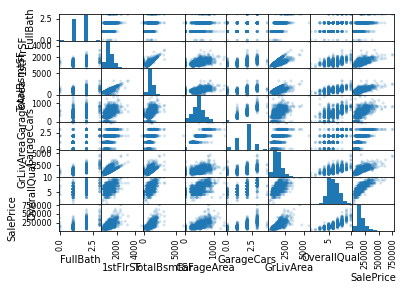

In [12]:
# The two most important variables are OverallQual and GrLivArea
# These correlate the most with sale prices as shown above
best_features = df.tail(7)['features'].tolist() + ['SalePrice']
print(best_features)
pd.plotting.scatter_matrix(train_df[best_features], alpha=0.2)

In [13]:
#I see that some variables like FullBath and GarageCars are mostly integer valued (some half baths)
#Hence you get the line shapes at the distinct 0,1,2,3.. values. 
#There is some unequal variance with higher end GrLivArea. 
#There is a high correlation between features which could hurt some regression techniques requiring matrix inversion.

In [14]:
#d

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#formula_str = 'SalePrice ~ ' + ' + '.join(features_list[2:])
#print(formula_str)
# errors out with features like 1stFlrSF + 2ndFlrSF
# Not all features will work

In [16]:
results = smf.ols("SalePrice ~ LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch  + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold", data=train_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     143.4
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:49:55   Log-Likelihood:                -13376.
No. Observations:                1121   AIC:                         2.682e+04
Df Residuals:                    1089   BIC:                         2.698e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.595e+05   1.73e+06     -0.324

In [17]:
#report which features have a 95% confidence interval that contains 0 and which do not.
#Comment on what this means.
results.params[results.pvalues < 0.05]

LotArea             0.601780
OverallQual     17855.936508
OverallCond      5534.155357
YearBuilt         320.757449
MasVnrArea         29.128193
BsmtFinSF1         10.931113
TotalBsmtSF        11.865673
GrLivArea          40.684648
BsmtFullBath     7359.862067
BedroomAbvGr    -8991.509124
KitchenAbvGr   -33957.556590
TotRmsAbvGrd     6243.176850
GarageCars      17277.843058
WoodDeckSF         22.589512
ScreenPorch        57.297528
PoolArea          -75.330484
dtype: float64

In [18]:
# The above features have 95% CI that does not include 0. 
# The rest of the features are not significant at alpha = 0.05
# This means if you repeatedly resample via the bootstrap (or subsample) from the train
# For non-significant features, the sign of the estimated coefficient would swap (e.g. neg->pos or pos->neg)
# more than 5% of the time. There is instability in the estimated coefficient.
# For significant features, the sign of the estimated coefficient would swap less than 5% of the time. 

In [19]:
#e

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

features_list = [
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

X_train, X_test, y_train, y_test = train_test_split(train_df[features_list], train_df['SalePrice'], test_size=0.2, random_state=42)

In [23]:
def rmse(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5


rmse_scorer = make_scorer(rmse, greater_is_better=False)


def score_model(parameters, reg_model):

    reg = Pipeline([
      ('imp', SimpleImputer()),
      ('std', StandardScaler()),
      ('reg', reg_model)])
    
    reg = GridSearchCV(reg, parameters, n_jobs=5, cv=10, scoring=rmse_scorer)
    reg.fit(X_train, y_train) 
    preds = reg.predict(X_test)
    rmse_val = rmse(y_test, preds)
    return rmse_val, reg



In [24]:
parameters = {'reg__fit_intercept':[True, False]}
reg_model = LinearRegression()

rmse_val, reg = score_model(parameters, reg_model)
print('local test rmse :' +str(round(rmse_val,1)))
print(reg.best_params_)
#brief description of how well it works and why: 
#OLS does well because the variables seem relevant.

local test rmse :37491.8
{'reg__fit_intercept': True}


In [25]:
parameters = {'reg__n_neighbors':[1,3,5,7,9,11]}
reg_model = KNeighborsRegressor()

rmse_val, reg = score_model(parameters, reg_model)
print('local test rmse :' +str(round(rmse_val,1)))
print(reg.best_params_)
#knn does less well because some variables are more important than others

local test rmse :40065.3
{'reg__n_neighbors': 9}


In [26]:
parameters = {'reg__alpha':[0.1, 0.5, 1, 2, 10, 100, 200, 300]}
reg_model = Ridge()

rmse_val, reg = score_model(parameters, reg_model)
print('local test rmse :' +str(round(rmse_val,1)))
print(reg.best_params_)
#ridge shows either multi-colinearity and high regularization is good

local test rmse :38303.6
{'reg__alpha': 200}


In [27]:
parameters = {'reg__alpha':[0.1, 1, 10, 100, 200, 400,800,1000]}
reg_model = Lasso()

rmse_val, reg = score_model(parameters, reg_model)
print('local test rmse :' +str(round(rmse_val,1)))
print(reg.best_params_)
#lasso with high regularization shows many features get zeroed out

local test rmse :38006.3
{'reg__alpha': 800}


In [28]:


def score_model_seq(params, direction_fb = 'forward'):

    reg = Pipeline([
      ('imp', SimpleImputer()),
      ('std', StandardScaler()),
      ('sel', SequentialFeatureSelector(LinearRegression(), 
                                      n_features_to_select=1.0,
                                      direction=direction_fb,
                                      scoring=rmse, cv=10, n_jobs=5)),
      ('reg', LinearRegression())])
    
    reg = GridSearchCV(reg, params, n_jobs=5, cv=10, scoring=rmse_scorer)
    reg.fit(X_train, y_train) 
    preds = reg.predict(X_test)
    rmse_val = rmse(y_test, preds)
    return rmse_val, reg

# Takes a while
#rmse_val, reg = score_model_seq({'sel__n_features_to_select':[0.1, 0.5, 0.9, 1]},'forward')
#print('local test rmse :' +str(round(rmse_val,1)))
#print(reg.best_params_)
#forward stepwise seems better with smaller than 100% of features input as possible
#local test rmse :37601.2
#{'sel__n_features_to_select': 0.9}

In [31]:

def score_model_seq(params, direction_fb = 'forward'):

    reg = Pipeline([
      ('imp', SimpleImputer()),
      ('std', StandardScaler()),
      ('sel', SequentialFeatureSelector(LinearRegression(), 
                                      n_features_to_select=1.0,
                                      direction=direction_fb,
                                      scoring=rmse, cv=10, n_jobs=5)),
      ('reg', LinearRegression())])
    
    reg = GridSearchCV(reg, params, n_jobs=5, cv=10, scoring=rmse_scorer)
    reg.fit(X_train, y_train) 
    preds = reg.predict(X_test)
    rmse_val = rmse(y_test, preds)
    return rmse_val, reg

#Takes a while, so commented out
#rmse_val, reg = score_model_seq({'sel__n_features_to_select':[0.1, 0.5, 0.9, 1]},'backward')
#print('local test rmse :' +str(round(rmse_val,1)))
#print(reg.best_params_)

#backwards also possible to use 
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV 
#local test rmse :40268.0
#{'sel__n_features_to_select': 0.9}

In [34]:
#f

In [35]:
parameters = {'reg__alpha':[0.1, 1, 10, 100, 200, 400,800,1000]}
reg_model = Lasso()

def score_model_poly(parameters, reg_model):

    reg = Pipeline([
      ('imp', SimpleImputer()),
      ('poly', PolynomialFeatures(degree=2, 
                                  interaction_only=False,
                                  include_bias=True, order='C')),
      ('std', StandardScaler()),
      ('reg', reg_model)])
    
    reg = GridSearchCV(reg, parameters, n_jobs=5, cv=10, scoring=rmse_scorer)
    reg.fit(X_train, y_train) 
    preds = reg.predict(X_test)
    rmse_val = rmse(y_test, preds)
    return rmse_val, reg

rmse_val, reg = score_model_poly(parameters, reg_model)
print('local test rmse :' +str(round(rmse_val,1)))
print(reg.best_params_)
# better than linear only, likely non-linearities in features
#local test rmse :30961.8 
#{'reg__alpha': 800}

local test rmse :30961.8
{'reg__alpha': 800}


In [36]:
parameters = {'reg__alpha':[0.1, 1, 10, 100, 200, 400,800,1000]}
reg_model = Ridge()

def score_model_poly(parameters, reg_model):

    reg = Pipeline([
      ('imp', SimpleImputer()),
      ('poly', PolynomialFeatures(degree=2, 
                                  interaction_only=False,
                                  include_bias=True, order='C')),
      ('std', StandardScaler()),
      ('reg', reg_model)])
    
    reg = GridSearchCV(reg, parameters, n_jobs=5, cv=10, scoring=rmse_scorer)
    reg.fit(X_train, y_train) 
    preds = reg.predict(X_test)
    rmse_val = rmse(y_test, preds)
    return rmse_val, reg

rmse_val, reg = score_model_poly(parameters, reg_model)
print('local test rmse :' +str(round(rmse_val,1)))
print(reg.best_params_)
# also better than linear only, likely non-linearities in features
#local test rmse :31065.7
#{'reg__alpha': 100}

local test rmse :31065.7
{'reg__alpha': 100}


In [37]:
parameters = {'reg__n_neighbors':[1,3,5,7,9,11]}
reg_model = KNeighborsRegressor()

def score_model_poly(parameters, reg_model):

    reg = Pipeline([
      ('imp', SimpleImputer()),
      ('poly', PolynomialFeatures(degree=2, 
                                  interaction_only=False,
                                  include_bias=True, order='C')),
      ('std', StandardScaler()),
      ('reg', reg_model)])
    
    reg = GridSearchCV(reg, parameters, n_jobs=5, cv=10, scoring=rmse_scorer)
    reg.fit(X_train, y_train) 
    preds = reg.predict(X_test)
    rmse_val = rmse(y_test, preds)
    return rmse_val, reg

rmse_val, reg = score_model_poly(parameters, reg_model)
print('local test rmse :' +str(round(rmse_val,1)))
print(reg.best_params_)
# worse than knn w/o quadratic. probably because of useless 2 way features not being regularized out
#local test rmse :41252.9
#{'reg__n_neighbors': 7}

local test rmse :41252.9
{'reg__n_neighbors': 7}


In [38]:
#g

In [39]:
reg = Pipeline([
      ('imp', SimpleImputer()),
      ('std', StandardScaler()),
      ('reg', Lasso(alpha=800))])

reg.fit(X_train, y_train) 

Pipeline(steps=[('imp', SimpleImputer()), ('std', StandardScaler()),
                ('reg', Lasso(alpha=800))])

In [40]:
zero_features = np.round(reg['reg'].coef_)
features_arr = np.array(features_list)
print('zeroed out features:')
print(features_arr[zero_features==0])
print('')
print('kept features:')
print(features_arr[zero_features!=0])
print('')

zeroed out features:
['BsmtFinSF2' 'BsmtUnfSF' '2ndFlrSF' 'LowQualFinSF' 'BsmtHalfBath'
 'HalfBath' 'OpenPorchSF' 'EnclosedPorch' 'MiscVal' 'MoSold' 'YrSold']

kept features:
['LotArea' 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd'
 'BsmtFinSF1' 'TotalBsmtSF' '1stFlrSF' 'GrLivArea' 'BsmtFullBath'
 'FullBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageCars' 'GarageArea' 'WoodDeckSF' '3SsnPorch' 'ScreenPorch'
 'PoolArea']



In [41]:
"""
1d showed the best univariate feature to be OverallQual, GrLivArea, GarageCars
 All kept
 
 The worst in 1d like BsmtFinSF2 was zeroed out by LASSO
"""

'\n1d showed the best univariate feature to be OverallQual, GrLivArea, GarageCars\n All kept\n \n The worst in 1d like BsmtFinSF2 was zeroed out by LASSO\n'

In [42]:
#h

In [1]:
from sklearn.ensemble import StackingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, cross_validate


estimators = [
     ('linear', LinearRegression()),
     ('lasso', Lasso(alpha=800)),
     ('ridge100', Lasso(alpha=100)),
     ('knn3', KNeighborsRegressor(n_neighbors=3)),
     ('knn9', KNeighborsRegressor(n_neighbors=9)),
     ('knn13', KNeighborsRegressor(n_neighbors=13))
]

def squared(x):
    return np.power(x,2)

tt_est = TransformedTargetRegressor(regressor=Ridge(alpha=30), func = np.sqrt, inverse_func=squared)
#                                       func=np.log, inverse_func=np.exp)

reg_model = StackingRegressor(estimators=estimators,passthrough=True,cv=10,
                              final_estimator=tt_est)
    
reg = Pipeline([
      ('imp', SimpleImputer()),
      ('poly', PolynomialFeatures(degree=2, 
                                  interaction_only=False,
                                  include_bias=True, order='C')),
      ('std', StandardScaler()),
      ('reg', reg_model)])
    
reg.fit(X_train, y_train) 
preds = reg.predict(X_test)
rmse_val = rmse(y_test, preds)

print(rmse_val)
#29746.63718916042 regular
#29216.258116381538 with tt_est squared

29398.97701009511


In [ ]:
cv_scores = cross_validate(reg, X_train, y_train, cv=10, scoring=rmse_scorer)
print(cv_scores['test_score'])
print(np.mean(cv_scores['test_score']))

In [45]:
test_df = pd.read_csv('test.csv')
preds = reg.predict(test_df[features_list])

sub_df = pd.DataFrame()
sub_df['Id'] = test_df['Id']
sub_df['SalePrice'] = preds

sub_df.to_csv("house_sub.csv", index=False)
sub_df.head(10)

,Id,SalePrice
0,1461,121007.060309
1,1462,144523.500262
2,1463,176290.757275
3,1464,188029.687827
4,1465,190652.984437
5,1466,175472.724031
6,1467,178828.072838
7,1468,164602.557976
8,1469,188064.925880
9,1470,119855.037150


In [ ]:
"""
This is regression so RMSE and not accuracy is used.
The rmse is within the local 10 cv rmse value range. 
Worse scores can be obtained by overfitting to the public leaderboard,
to your local holdout, and so forth.
Generally if you do CV correctly, you can expect some difference
between local CV and local holdout because of a random draw effect.
Once you use the holdout, it's value as a single shot is lost.

Kaggle may not use a random split between train and test. There could
be a time based split. 
Kaggle's split into public and private leaderboard is not the same
as how we do local CV in general.
This depends on the competition. The goal of local CV is to simulate
the Kaggle private LB split when possible.
"""